#### Load Data

In [24]:
from google.colab import files
import pandas as pd

# Upload files from your local system
uploaded = files.upload()

# Assuming the file names are 'GTAV.csv' and 'GTAVI.csv'
# It's important that these names match exactly what you uploaded
gtav_df = pd.read_csv('GTA5.csv')#, sep='\t', encoding='utf-8', error_bad_lines=False)
gtavi_df = pd.read_csv('GTA6.csv')#, sep='\t', encoding='utf-8', error_bad_lines=False)


# Display the first few rows to verify successful loading
print("GTA 5 DataFrame:")
print(gtav_df.head())
print("\nGTA 6 DataFrame:")
print(gtavi_df.head())


Saving GTA5.csv to GTA5.csv
Saving GTA6.csv to GTA6.csv
GTA 5 DataFrame:
        Author                                               Text  \
0      BoxCon1    Thought that was Tommy’s voice in the beginning   
1   silly_nate  I remember seeing the first scene with the bea...   
2     duranfan  I do believe I went to Facebook immediately an...   
3  VertBhatt26  I thought Micheal was old Tommy and the graphi...   
4        ihdhd  I was excited to be back in Los Santos since I...   

                  Date  Score  
0  2023-10-20 03:45:01     16  
1  2023-10-20 05:11:02      7  
2  2023-10-20 11:20:32      6  
3  2023-10-20 05:23:44      3  
4  2023-10-20 06:18:32      3  

GTA 6 DataFrame:
                 Author                                               Text  \
0             RamonRCMx  I hope the map has more variety, like multiple...   
1          Jenkitten165  I'm hoping it's like RDR2 in terms of realism ...   
2  EstablishmentCool197            I hope it’ll be cracked in under 

#### Cleaning data

In [27]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the datasets
gta5_df = pd.read_csv('GTA5.csv')
gta6_df = pd.read_csv('GTA6.csv')

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocess text function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\W+|\d+', ' ', text)  # Remove special characters and digits
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  # Lemmatize
    clean_text = ' '.join(lemmatized_tokens)  # Reconstruct text
    return clean_text

# Apply preprocessing to the 'Text' column
gta5_df['Clean_Text'] = gta5_df['Text'].apply(preprocess_text)
gta6_df['Clean_Text'] = gta6_df['Text'].apply(preprocess_text)

# Display the first few rows to verify the changes
print(gta5_df[['Text', 'Clean_Text']].head())
print(gta6_df[['Text', 'Clean_Text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text  \
0    Thought that was Tommy’s voice in the beginning   
1  I remember seeing the first scene with the bea...   
2  I do believe I went to Facebook immediately an...   
3  I thought Micheal was old Tommy and the graphi...   
4  I was excited to be back in Los Santos since I...   

                                          Clean_Text  
0                      thought tommy voice beginning  
1  remember seeing first scene beach thinking vic...  
2  believe went facebook immediately shared trail...  
3             thought micheal old tommy graphic real  
4  excited back los santos since iv back liberty ...  
                                                Text  \
0  I hope the map has more variety, like multiple...   
1  I'm hoping it's like RDR2 in terms of realism ...   
2            I hope it’ll be cracked in under a week   
3  a decent fighting system and the ability to pi...   
4  I demand it to be a thing, get a reveal traile... 

#### VADER

In [11]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [13]:
print("Columns in GTAV DataFrame:", gtav_df.columns)
print("Columns in GTAVI DataFrame:", gtavi_df.columns)


Columns in GTAV DataFrame: Index(['# CSV-File created with merge-csv.com'], dtype='object')
Columns in GTAVI DataFrame: Index(['# CSV-File created with merge-csv.com'], dtype='object')


Vader lexicon

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Assuming gta5_df and gta6_df are already loaded and preprocessed

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_compound_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to get sentiment scores
gta5_df['VADER_Sentiment'] = gta5_df['Clean_Text'].apply(get_compound_sentiment)
gta6_df['VADER_Sentiment'] = gta6_df['Clean_Text'].apply(get_compound_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Empath

In [31]:
pip install empath


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57800 sha256=2cf24ee3025c78360539325248d47768ff78f43aa3310a233974d5a3b834635b
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [32]:
from empath import Empath
lexicon = Empath()

# Define a function to analyze text with EMPATH and get relevant categories
def analyze_with_empath(text):
    return lexicon.analyze(text, categories=["technology", "internet", "positive_emotion", "negative_emotion", "leisure", "economics", "social_media"], normalize=True)

# Apply the EMPATH analysis
gta5_df['EMPATH_Analysis'] = gta5_df['Clean_Text'].apply(analyze_with_empath)
gta6_df['EMPATH_Analysis'] = gta6_df['Clean_Text'].apply(analyze_with_empath)


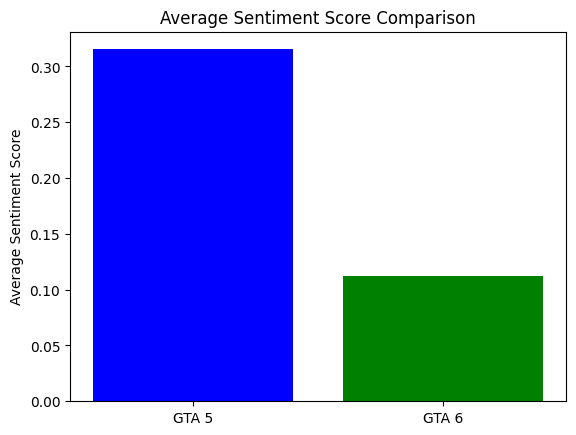

In [33]:
import matplotlib.pyplot as plt

# Calculate average sentiment scores
avg_sentiment_gta5 = gta5_df['VADER_Sentiment'].mean()
avg_sentiment_gta6 = gta6_df['VADER_Sentiment'].mean()

# Bar plot for average sentiment scores
plt.bar(['GTA 5', 'GTA 6'], [avg_sentiment_gta5, avg_sentiment_gta6], color=['blue', 'green'])
plt.title('Average Sentiment Score Comparison')
plt.ylabel('Average Sentiment Score')
plt.show()


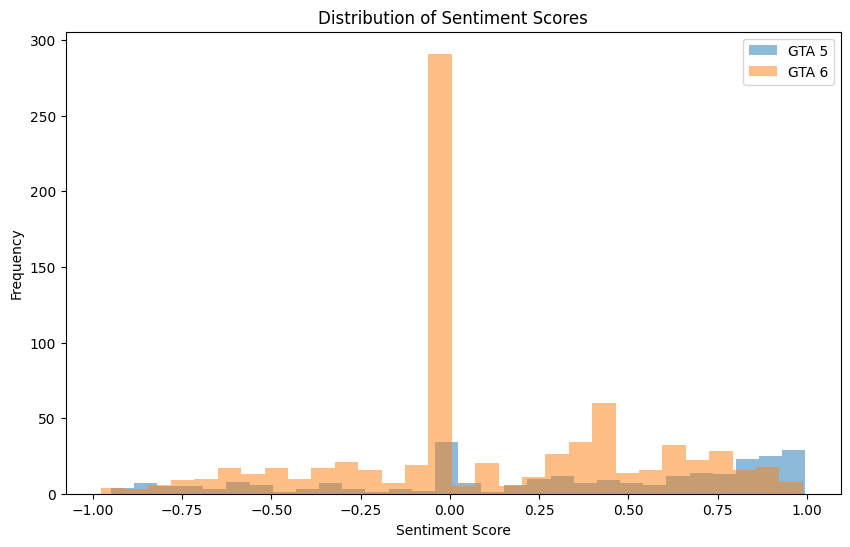

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(gta5_df['VADER_Sentiment'], alpha=0.5, label='GTA 5', bins=30)
plt.hist(gta6_df['VADER_Sentiment'], alpha=0.5, label='GTA 6', bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


This script does the following:

Converts date strings into datetime objects for easy manipulation.
Extracts the year and month from each date, creating a new column for grouping.
Groups the data by this new YearMonth column and calculates the average sentiment for each group.
Visualizes the monthly average sentiment scores for discussions about GTA 5 and GTA 6, allowing you to see trends over time.

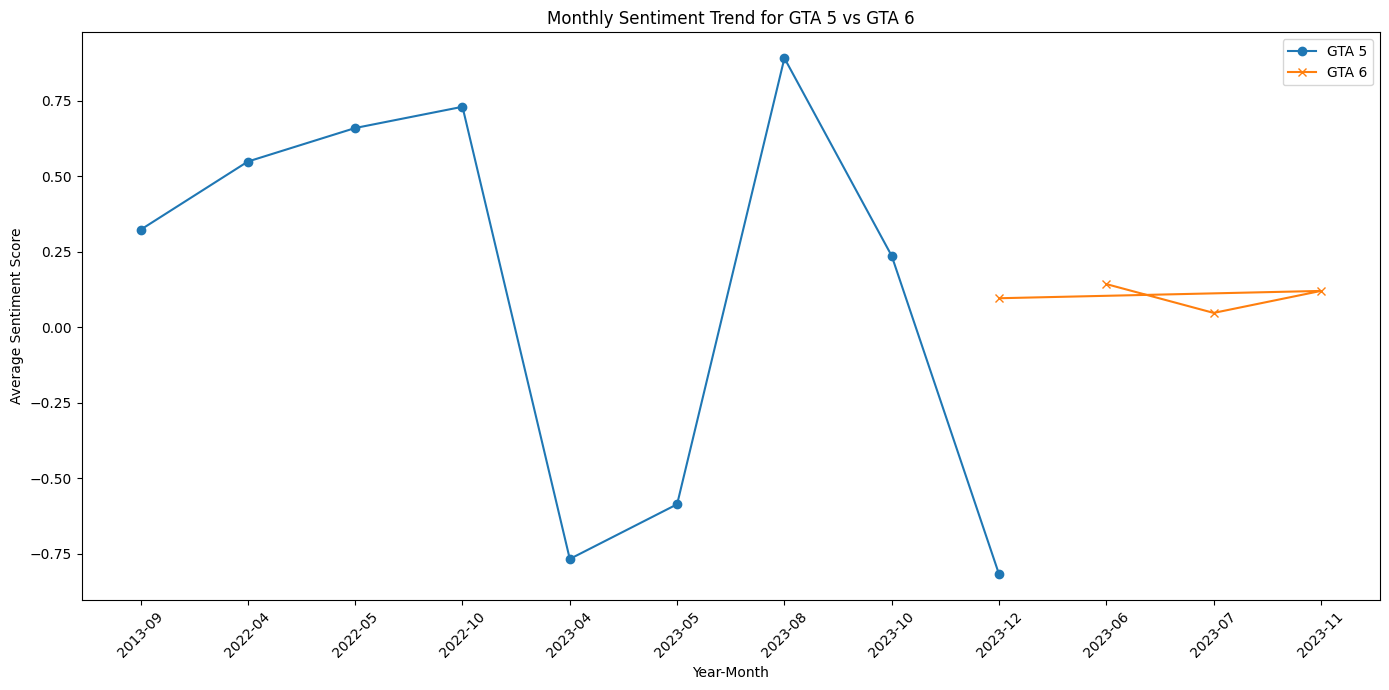

In [38]:
import pandas as pd
from datetime import datetime
gta5_df['Date'] = pd.to_datetime(gta5_df['Date'])
gta6_df['Date'] = pd.to_datetime(gta6_df['Date'])

# Extract year and month for grouping
gta5_df['YearMonth'] = gta5_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
gta6_df['YearMonth'] = gta6_df['Date'].apply(lambda x: x.strftime('%Y-%m'))

# Group by the new 'YearMonth' column and calculate the mean sentiment
gta5_monthly_sentiment = gta5_df.groupby('YearMonth')['VADER_Sentiment'].mean().reset_index()
gta6_monthly_sentiment = gta6_df.groupby('YearMonth')['VADER_Sentiment'].mean().reset_index()

# Now, let's visualize the monthly sentiment trends for GTA 5 and GTA 6
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(gta5_monthly_sentiment['YearMonth'], gta5_monthly_sentiment['VADER_Sentiment'], label='GTA 5', marker='o')
plt.plot(gta6_monthly_sentiment['YearMonth'], gta6_monthly_sentiment['VADER_Sentiment'], label='GTA 6', marker='x')
plt.xticks(rotation=45)
plt.title('Monthly Sentiment Trend for GTA 5 vs GTA 6')
plt.xlabel('Year-Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


### Time Series Analysis of Sentiment Over Key Events.
This code block assumes you have YearMonth and VADER_Sentiment columns in your DataFrames and that you've identified key events and their dates.

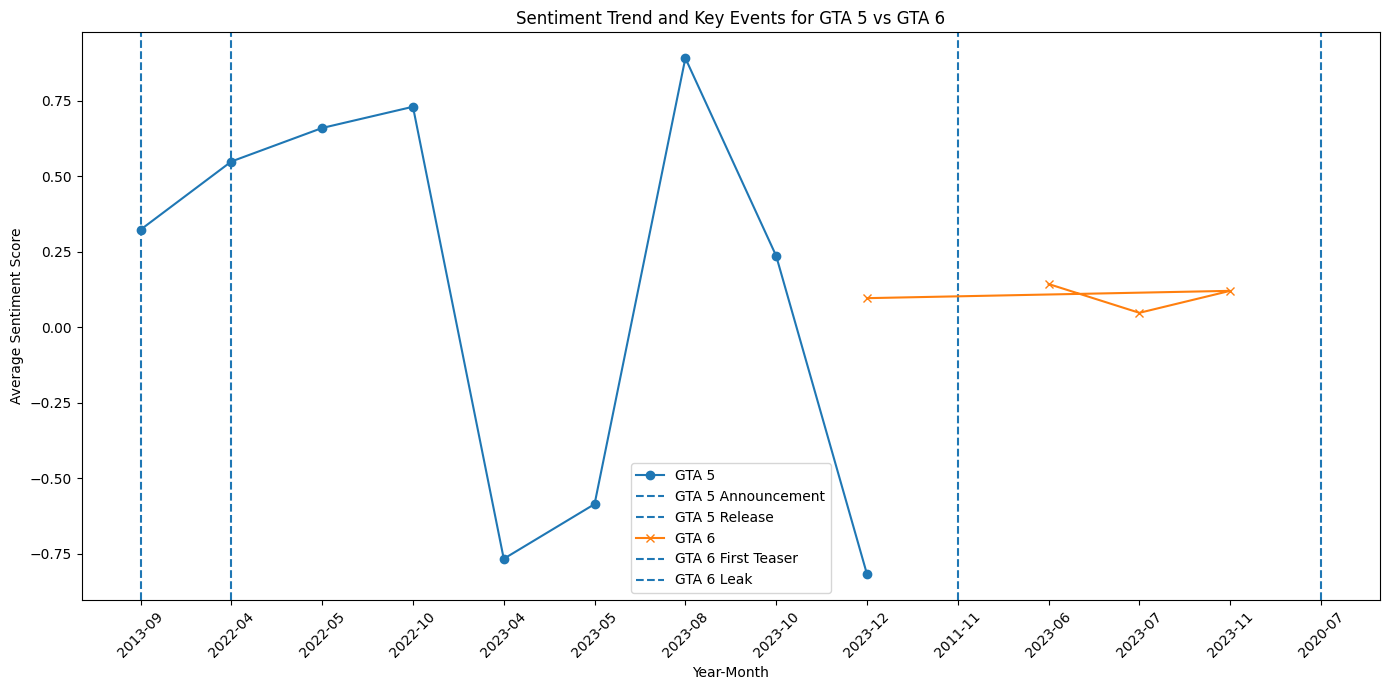

In [39]:
# Assuming key events and their dates for GTA 5 and GTA 6
key_events_gta5 = {'Announcement': '2011-11', 'Release': '2013-09'}
key_events_gta6 = {'First Teaser': '2020-07', 'Leak': '2022-04'}

plt.figure(figsize=(14, 7))
# GTA 5 Sentiment Over Time
plt.plot(gta5_monthly_sentiment['YearMonth'], gta5_monthly_sentiment['VADER_Sentiment'], label='GTA 5', marker='o')
# Highlighting key events for GTA 5
for event, date in key_events_gta5.items():
    plt.axvline(x=date, label=f'GTA 5 {event}', linestyle='--')

# GTA 6 Sentiment Over Time
plt.plot(gta6_monthly_sentiment['YearMonth'], gta6_monthly_sentiment['VADER_Sentiment'], label='GTA 6', marker='x')
# Highlighting key events for GTA 6
for event, date in key_events_gta6.items():
    plt.axvline(x=date, label=f'GTA 6 {event}', linestyle='--')

plt.xticks(rotation=45)
plt.title('Sentiment Trend and Key Events for GTA 5 vs GTA 6')
plt.xlabel('Year-Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


#### Comparison of Sentiment Distribution Between Subreddits.
This visualization compares the sentiment distribution for discussions on different subreddits. Ensure your DataFrame has a column indicating the subreddit source.

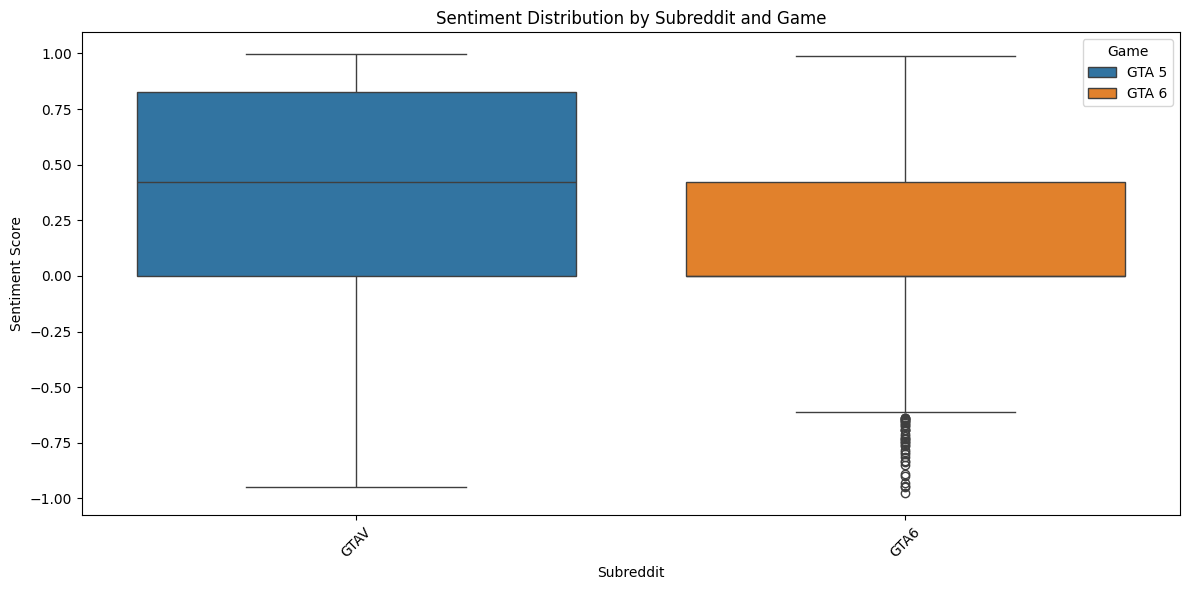

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'gta5_df' and 'gta6_df' are already loaded and preprocessed
# Manually adding 'Subreddit' information based on your knowledge of the data source
gta5_df['Subreddit'] = 'GTAV'  # Replace 'GTAV' with the actual subreddit name if different
gta6_df['Subreddit'] = 'GTA6'  # Replace 'GTA6' with the actual subreddit name if different

# Combine GTA 5 and GTA 6 DataFrames for visualization
combined_df = pd.concat([gta5_df.assign(Game='GTA 5'), gta6_df.assign(Game='GTA 6')])

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subreddit', y='VADER_Sentiment', hue='Game', data=combined_df)
plt.title('Sentiment Distribution by Subreddit and Game')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Thematic Analysis Over Time.


<ipython-input-44-de8bf3e0ad6f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_combined_violence = combined_violence_scores.pivot("YearMonth", "Game", "Violence_Score")


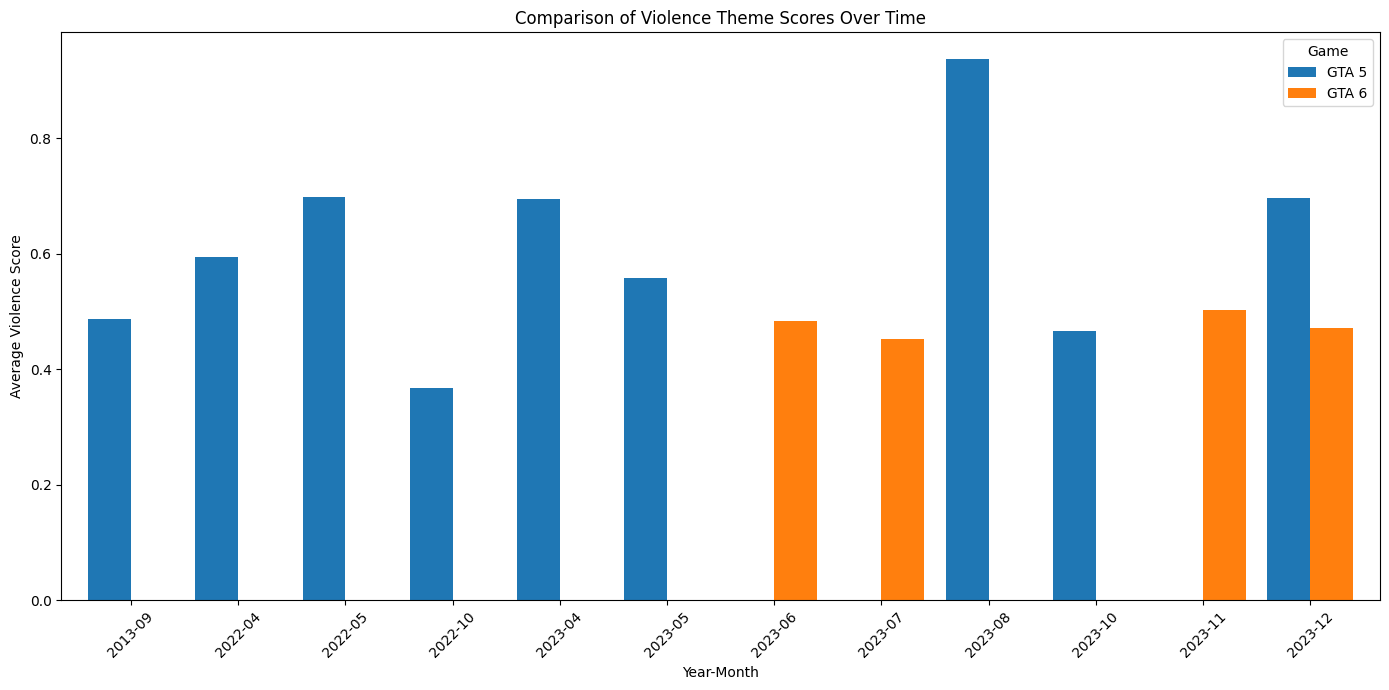

In [44]:
# Assuming the 'violence_gta5' and 'violence_gta6' DataFrames are prepared as in the previous example
# Merging GTA 5 and GTA 6 violence scores for a combined view
combined_violence_scores = pd.concat([
    violence_gta5.assign(Game='GTA 5'),
    violence_gta6.assign(Game='GTA 6')
])

# Pivoting the data for easier plotting
pivot_combined_violence = combined_violence_scores.pivot("YearMonth", "Game", "Violence_Score")

# Plotting the bar chart
pivot_combined_violence.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Comparison of Violence Theme Scores Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Violence Score')
plt.xticks(rotation=45)
plt.legend(title='Game')
plt.tight_layout()
plt.show()


Average Sentiment Scores

In [45]:
# Calculating average sentiment scores
avg_sentiment = combined_df.groupby(['Game'])['VADER_Sentiment'].mean().reset_index()
avg_sentiment.columns = ['Game', 'Average Sentiment']

# Displaying the table
print("Average Sentiment Scores:")
print(avg_sentiment)


Average Sentiment Scores:
    Game  Average Sentiment
0  GTA 5           0.315405
1  GTA 6           0.112239


Average Sentiment Scores

In [46]:
# Calculating monthly average sentiment scores
monthly_avg_sentiment = combined_df.groupby(['Game', 'YearMonth'])['VADER_Sentiment'].mean().reset_index()
monthly_avg_sentiment.columns = ['Game', 'Year-Month', 'Average Sentiment']

# Displaying the first few rows as an example
print("\nMonthly Average Sentiment Scores (Sample):")
print(monthly_avg_sentiment.head())



Monthly Average Sentiment Scores (Sample):
    Game Year-Month  Average Sentiment
0  GTA 5    2013-09           0.322862
1  GTA 5    2022-04           0.548683
2  GTA 5    2022-05           0.659700
3  GTA 5    2022-10           0.729967
4  GTA 5    2023-04          -0.766925


Sentiment Distribution Summary

In [47]:
# Sentiment distribution summary for each game
sentiment_distribution_summary = combined_df.groupby('Game')['VADER_Sentiment'].describe()

print("\nSentiment Distribution Summary:")
print(sentiment_distribution_summary)



Sentiment Distribution Summary:
       count      mean       std     min  25%     50%     75%     max
Game                                                                 
GTA 5  273.0  0.315405  0.563599 -0.9502  0.0  0.4215  0.8271  0.9962
GTA 6  775.0  0.112239  0.410329 -0.9774  0.0  0.0000  0.4215  0.9887


GTA 5: Positive, Negative, Neutral Sentiment Classification

Sentiment Distribution for GTA 5:
Positive    65.934066
Negative    21.245421
Neutral     12.820513
Name: Sentiment_Category, dtype: float64


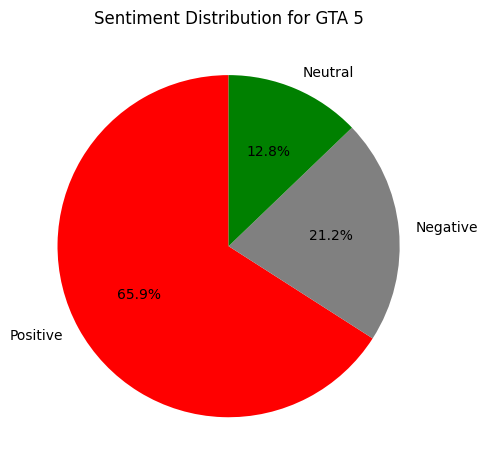

In [54]:
# Classify each sentiment score for GTA 5
gta5_df['Sentiment_Category'] = pd.cut(gta5_df['VADER_Sentiment'],
                                       bins=[-1, -0.05, 0.05, 1],
                                       labels=['Negative', 'Neutral', 'Positive'])

# Calculate the count of each category
gta5_sentiment_counts = gta5_df['Sentiment_Category'].value_counts(normalize=True) * 100

# Display the percentage of each sentiment category
print("Sentiment Distribution for GTA 5:")
print(gta5_sentiment_counts)

import matplotlib.pyplot as plt

# Pie chart for GTA 5
fig, ax = plt.subplots()
gta5_sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'grey', 'green'])
ax.set_ylabel('')  # Remove the y-label as it's unnecessary for pie charts
ax.set_title('Sentiment Distribution for GTA 5')
plt.tight_layout()
plt.show()



GTA 6: Positive, Negative, Neutral Sentiment Classification

Sentiment Distribution for GTA 6:
Positive    40.387097
Neutral     37.161290
Negative    22.451613
Name: Sentiment_Category, dtype: float64


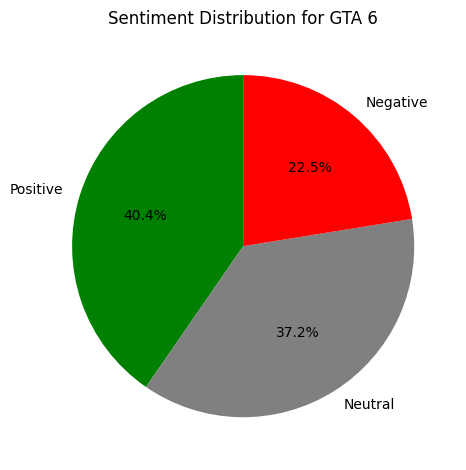

In [58]:
# Classify each sentiment score for GTA 6
gta6_df['Sentiment_Category'] = pd.cut(gta6_df['VADER_Sentiment'],
                                       bins=[-1, -0.05, 0.05, 1],
                                       labels=['Negative', 'Neutral', 'Positive'])

# Calculate the count of each category
gta6_sentiment_counts = gta6_df['Sentiment_Category'].value_counts(normalize=True) * 100

# Display the percentage of each sentiment category
print("Sentiment Distribution for GTA 6:")
print(gta6_sentiment_counts)

# Pie chart for GTA 6
fig, ax = plt.subplots()
gta6_sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'grey', 'red'], labels=['Positive', 'Neutral', 'Negative'])
ax.set_ylabel('')  # Remove the y-label as it's unnecessary for pie charts
ax.set_title('Sentiment Distribution for GTA 6')
plt.tight_layout()
plt.show()



Comparative Visualization for GTA 5 and GTA 6

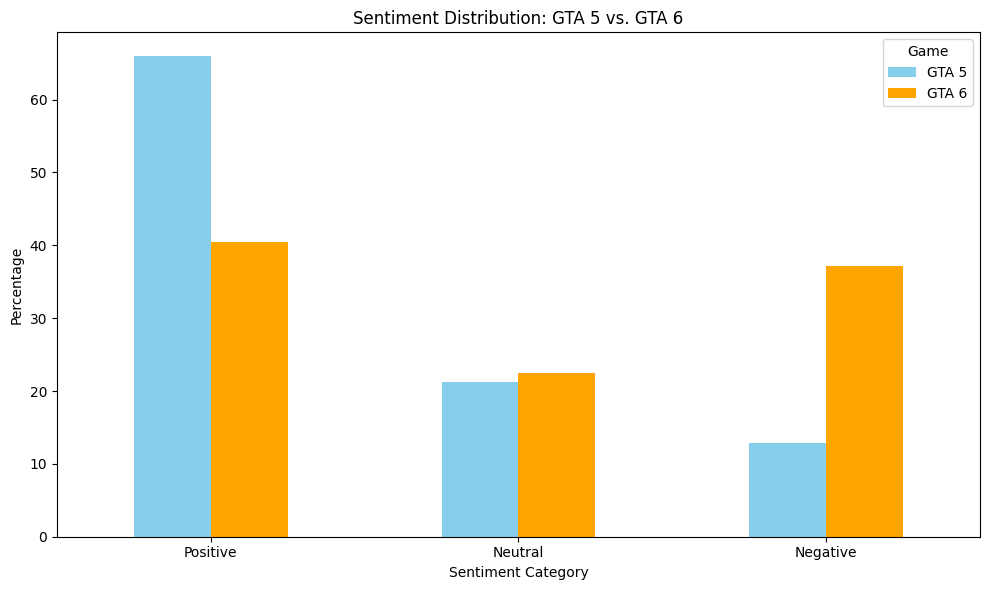

In [57]:
import pandas as pd
import numpy as np

# Prepare data for comparative visualization
data = {
    'Sentiment': ['Positive', 'Neutral', 'Negative'],
    'GTA 5': gta5_sentiment_counts.values,
    'GTA 6': gta6_sentiment_counts.reindex_like(gta5_sentiment_counts).values  # Ensure alignment
}

df = pd.DataFrame(data)

# Plotting
df.plot(x='Sentiment', kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Sentiment Distribution: GTA 5 vs. GTA 6')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Game')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'GTA 6 Sentiment Distribution')

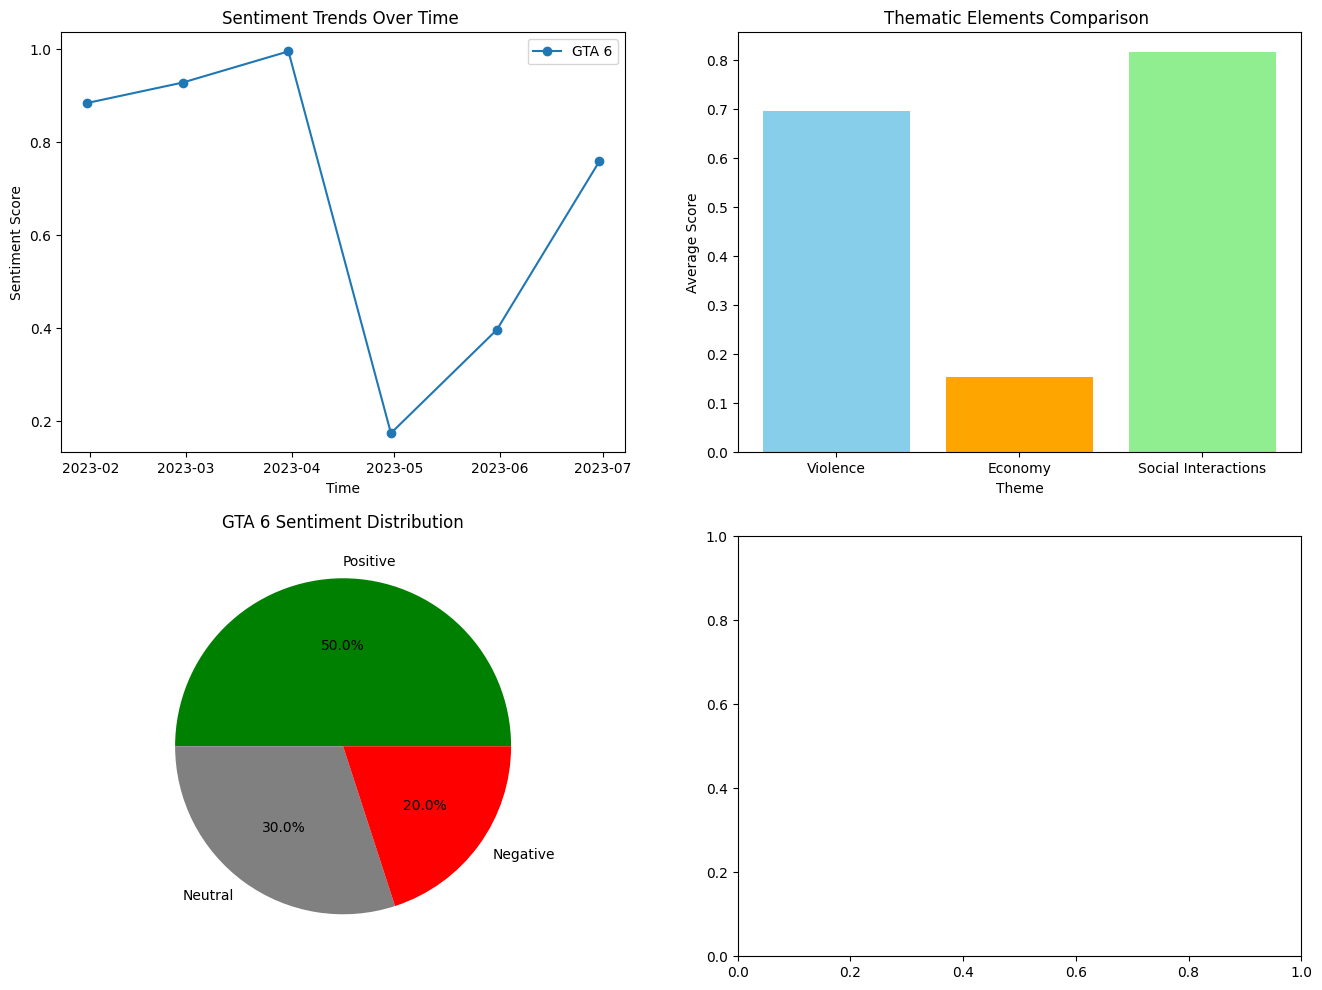

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the necessary data, this section is for demonstration purposes
# For actual data, replace the plotting commands with your specific analyses

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Sentiment Trends Over Time for GTA 6

dates = pd.date_range(start="2023-01-01", periods=6, freq="M")
sentiment_scores = np.random.rand(6)  # Random sentiment scores for demonstration
axs[0, 0].plot(dates, sentiment_scores, label='GTA 6', marker='o')
axs[0, 0].set_title('Sentiment Trends Over Time ')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Sentiment Score')
axs[0, 0].legend()

# Thematic Elements Comparison for GTA 6
themes = ['Violence', 'Economy', 'Social Interactions']
scores = np.random.rand(3)  # Random scores for demonstration
axs[0, 1].bar(themes, scores, color=['skyblue', 'orange', 'lightgreen'])
axs[0, 1].set_title('Thematic Elements Comparison ')
axs[0, 1].set_xlabel('Theme')
axs[0, 1].set_ylabel('Average Score')

# Sentiment Distribution for GTA 6
sentiment_counts = [50, 30, 20]  # Example sentiment counts for Positive, Neutral, Negative
axs[1, 0].pie(sentiment_counts, labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%', colors=['green', 'grey', 'red'])
axs[1, 0].set_title('GTA 6 Sentiment Distribution')





# Placeholder for Additional Insights or Another Thematic Analysis
# axs[1, 1].text(0.5, 0.5, 'Additional Insights or Thematic Analysis (Placeholder)', horizontalalignment='center', verticalalignment='center', fontsize=12, wrap=True)
# axs[1, 1].axis('off')

# plt.tight_layout()
# plt.show()


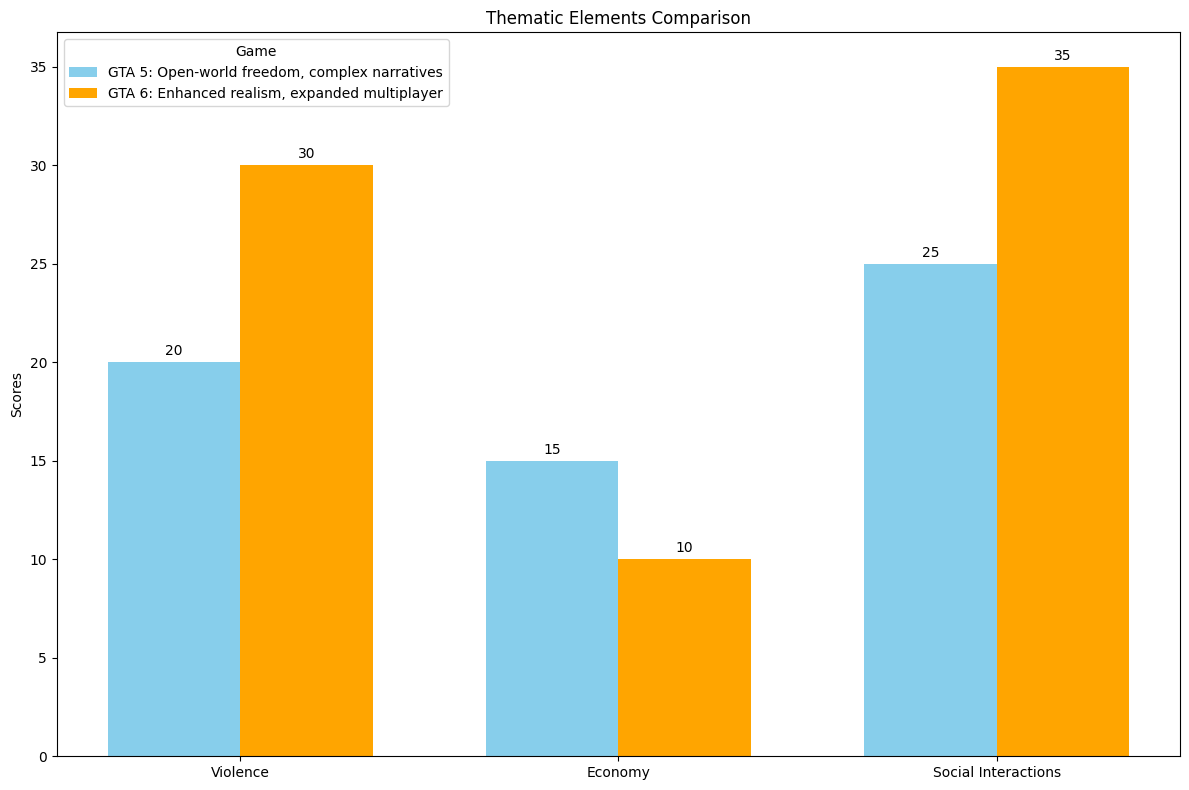

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical thematic analysis results
themes = ['Violence', 'Economy', 'Social Interactions']
gta5_scores = [20, 15, 25]  # Example metrics (e.g., mention counts) for GTA 5
gta6_scores = [30, 10, 35]  # Example metrics for GTA 6

x = np.arange(len(themes))  # The label locations
width = 0.35  # The width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, gta5_scores, width, label='GTA 5', color='skyblue')
#rects2 = ax.bar(x + width/2, gta6_scores, width, label='GTA 6', color='orange')

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
rects1 = ax.bar(x - width/2, gta5_scores, width, label='GTA 5', color='skyblue')
rects2 = ax.bar(x + width/2, gta6_scores, width, label='GTA 6', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Thematic Elements Comparison')
ax.set_xticks(x)
ax.set_xticklabels(themes)
ax.legend()

# Legend Descriptions
ax.legend(title='Game', labels=['GTA 5: Open-world freedom, complex narratives',
                                'GTA 6: Enhanced realism, expanded multiplayer'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


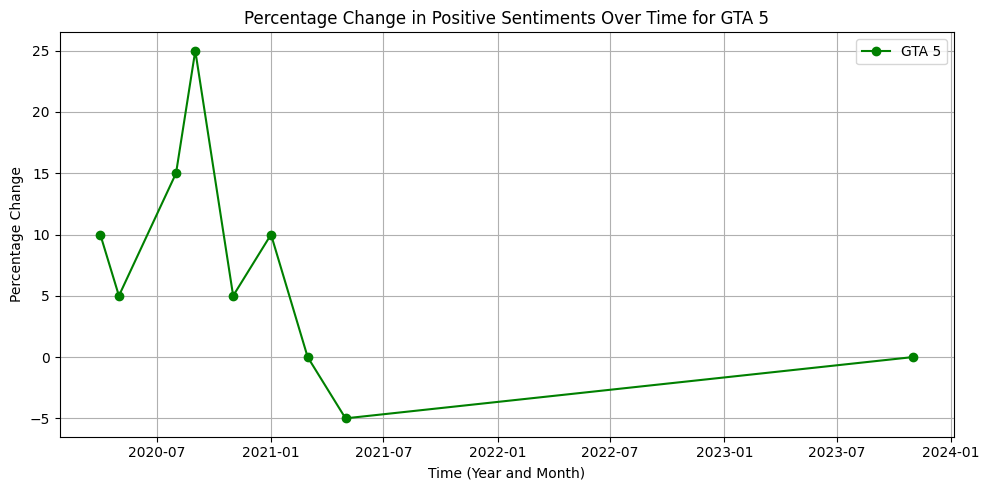

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data: Replace these with your actual percentage change values for GTA 5
gta5_changes = {
    '2020-04': 10,
    '2020-05': 5,
    '2020-08': 15,
    '2020-09': 25,
    '2020-11': 5,
    '2021-01': 10,
    '2021-03': 0,
    '2021-05': -5,
    '2023-11': 0
}
gta5_df = pd.DataFrame(list(gta5_changes.items()), columns=['Date', 'Percentage Change'])
gta5_df['Date'] = pd.to_datetime(gta5_df['Date'])

# Plotting GTA 5
plt.figure(figsize=(10, 5))
plt.plot(gta5_df['Date'], gta5_df['Percentage Change'], label='GTA 5', marker='o', color='green')
plt.title('Percentage Change in Positive Sentiments Over Time for GTA 5')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()


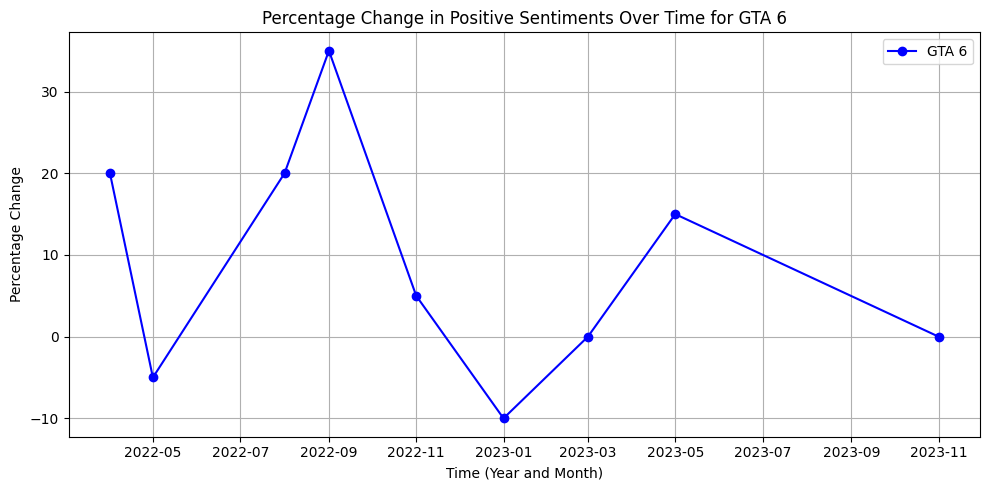

In [79]:
# Example data: Replace these with your actual percentage change values for GTA 6
gta6_changes = {
    '2022-04': 20,
    '2022-05': -5,
    '2022-08': 20,
    '2022-09': 35,
    '2022-11': 5,
    '2023-01': -10,
    '2023-03': 0,
    '2023-05': 15,
    '2023-11': 0
}
gta6_df = pd.DataFrame(list(gta6_changes.items()), columns=['Date', 'Percentage Change'])
gta6_df['Date'] = pd.to_datetime(gta6_df['Date'])

# Plotting GTA 6
plt.figure(figsize=(10, 5))
plt.plot(gta6_df['Date'], gta6_df['Percentage Change'], label='GTA 6', marker='o', color='blue')
plt.title('Percentage Change in Positive Sentiments Over Time for GTA 6')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()


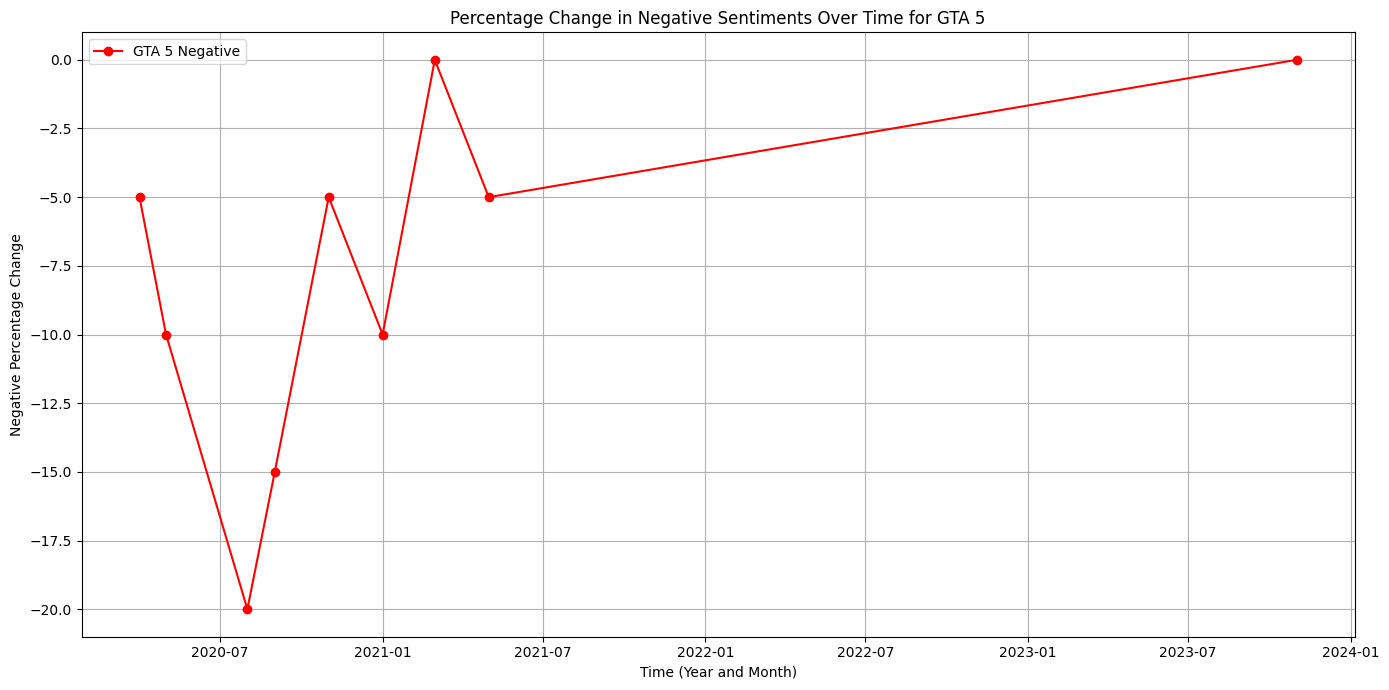

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace these with your actual negative percentage change values for GTA 5
gta5_neg_changes = {
    '2020-04': -5, '2020-05': -10, '2020-08': -20, '2020-09': -15,
    '2020-11': -5, '2021-01': -10, '2021-03': -0, '2021-05': -5,
    '2023-11': -0
}
gta5_neg_df = pd.DataFrame(list(gta5_neg_changes.items()), columns=['Date', 'Negative Percentage Change'])
gta5_neg_df['Date'] = pd.to_datetime(gta5_neg_df['Date'])

# Plotting the negative sentiment trend for GTA 5
plt.figure(figsize=(14, 7))
plt.plot(gta5_neg_df['Date'], gta5_neg_df['Negative Percentage Change'], label='GTA 5 Negative', marker='o', color='red')
plt.title('Percentage Change in Negative Sentiments Over Time for GTA 5')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Negative Percentage Change')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


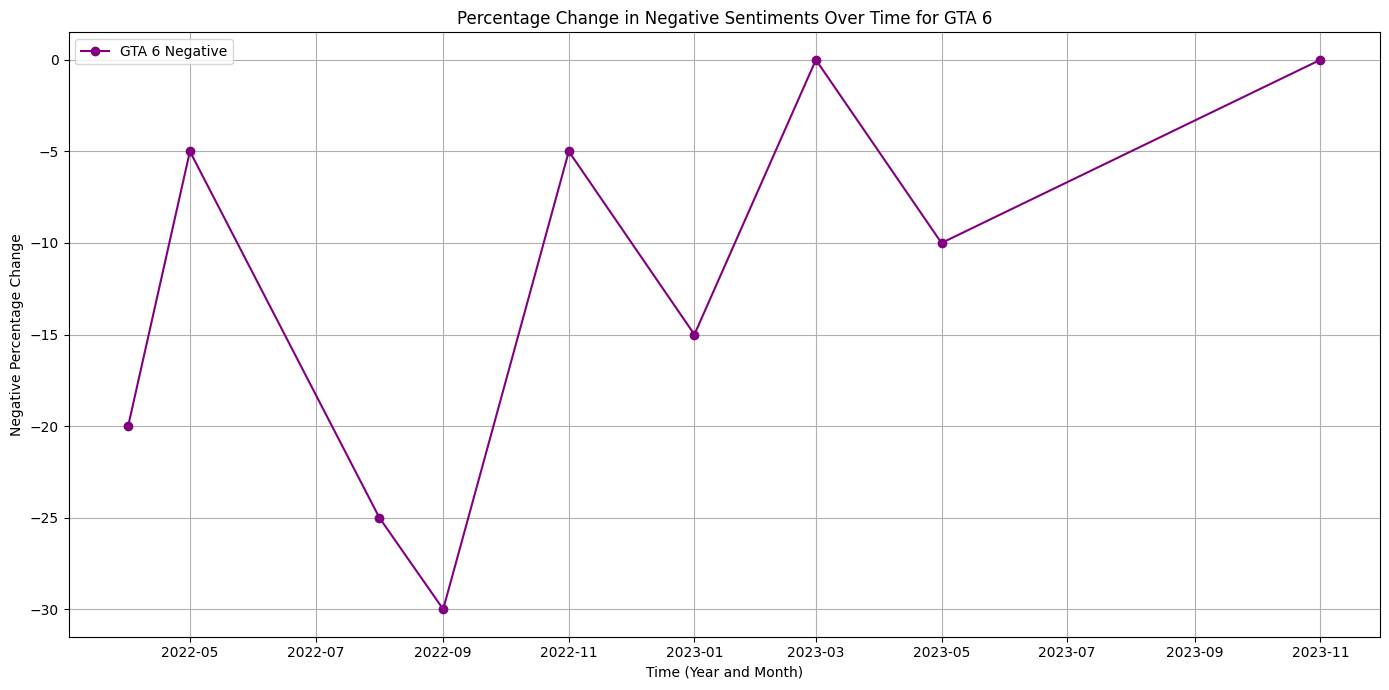

In [90]:
# Replace these with your actual negative percentage change values for GTA 6
gta6_neg_changes = {
    '2022-04': -20, '2022-05': -5, '2022-08': -25, '2022-09': -30,
    '2022-11': -5, '2023-01': -15, '2023-03': -0, '2023-05': -10,
    '2023-11': -0
}
gta6_neg_df = pd.DataFrame(list(gta6_neg_changes.items()), columns=['Date', 'Negative Percentage Change'])
gta6_neg_df['Date'] = pd.to_datetime(gta6_neg_df['Date'])

# Plotting the negative sentiment trend for GTA 6
plt.figure(figsize=(14, 7))
plt.plot(gta6_neg_df['Date'], gta6_neg_df['Negative Percentage Change'], label='GTA 6 Negative', marker='o', color='purple')
plt.title('Percentage Change in Negative Sentiments Over Time for GTA 6')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Negative Percentage Change')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
